In [1]:
import pandas as pd
import numpy as np
import torch
from torch import Tensor
import seaborn as sns
from matplotlib import pyplot as plt
from utils import distribution_functions, NNarySearch


### Torch logistic function

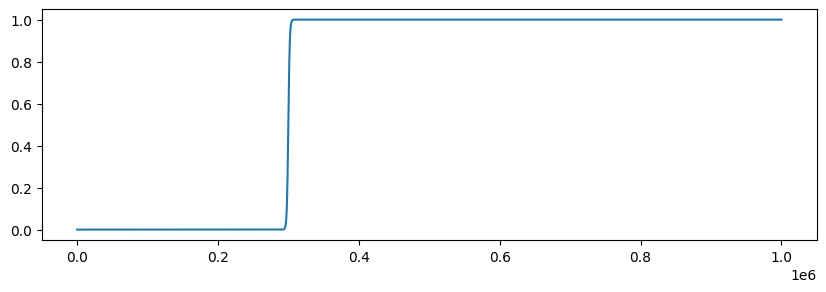

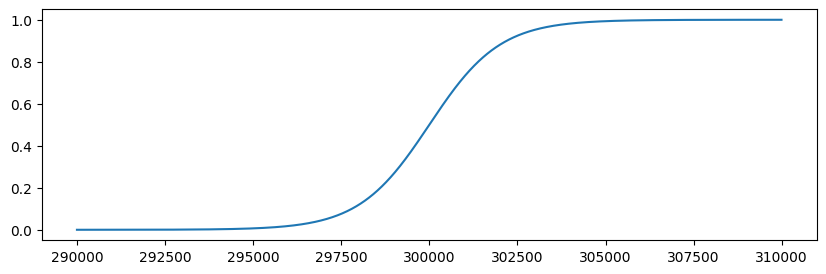

In [2]:
linspace, logistic = distribution_functions.logistic_tensor(3e5, 1e-3, 0, 1e6)


plt.figure(figsize=(10, 3))
sns.lineplot(x=linspace.numpy(), y=logistic.numpy());
plt.figure(figsize=(10, 3))

mask = (linspace > 2.9e5) & (linspace < 3.1e5)
sns.lineplot(x=linspace[mask].numpy(), y=logistic[mask].numpy());

# Binary search simulation

<Axes: >

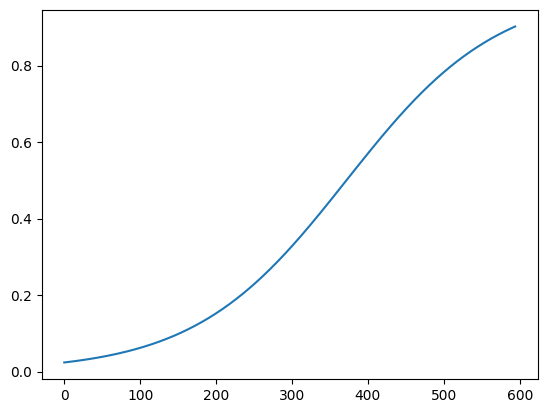

In [3]:
binary = NNarySearch(n=5, bounds=(0.1, 0.9), split_power=0.2)

res, start, end = binary.run_search(logistic)
sns.lineplot(res)


Text(0.5, 1.0, 'Average number of iterations for linear inflection distribution')

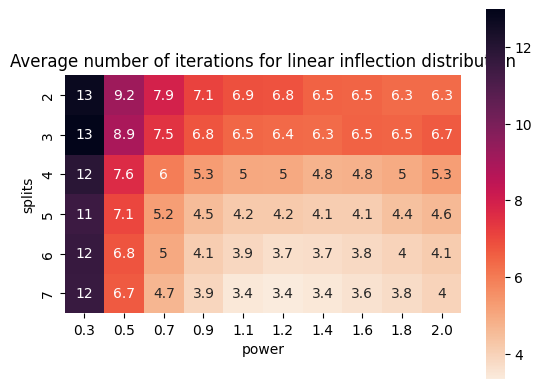

In [6]:
from utils.binary_notebook_helpers import run_simulations

center_space = np.linspace(1e2, 2e5, 100)
power_space = np.linspace(0.3, 2, 10)
split_space = np.arange(2, 8)

pivot = run_simulations(center_space, power_space, split_space, )


sns.heatmap(
    pivot, 
    square=True,
    cmap=sns.color_palette("rocket_r", as_cmap=True)
)
plt.title("Average number of iterations for linear inflection distribution")

Linear model performs best with linear data.
* Minimal negative effect of using power search
4-5 nary search appears to be the sweetsop.

Text(0.5, 1.0, 'Average number of iterations for logistic distribution')

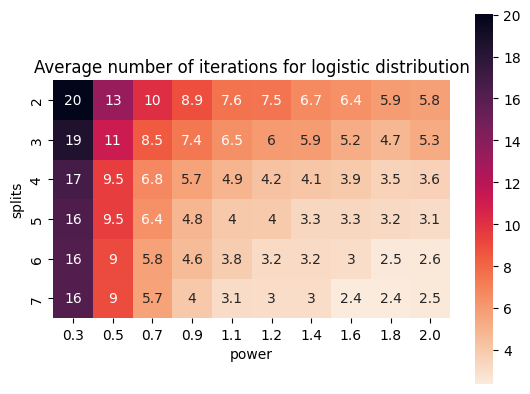

In [8]:
pivot = run_simulations(np.logspace(1, 5, 100), power_space, split_space, )
sns.heatmap(
    pivot, 
    annot=True,
    square = True,
    cmap=sns.color_palette("rocket_r", as_cmap=True)
)
plt.title("Average number of iterations for logistic distribution")

Significant improvements from power search for power data.
* 4 nary search provides ideal tradeoff between repeats and marginal gains.
* Some interactions from my data not being random.